In [1]:
# Import libraries
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Load the data
url = '/content/sample_data/Filtered_Phenotypic_Data.csv'  # Replace with your file path or URL
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())


   SUB_ID       FILE_ID  AGE_AT_SCAN  DX_GROUP  anat_cnr  anat_efc  anat_fber  \
0   50004  Pitt_0050004        19.09         1  7.698144  1.226218   9.725750   
1   50005  Pitt_0050005        13.73         1  9.071807  1.256278  11.198226   
2   50006  Pitt_0050006        13.37         1  8.026798  1.407166   6.282055   
3   50007  Pitt_0050007        17.78         1  5.775897  1.161231   6.991093   
4   50008  Pitt_0050008        32.45         1  6.669686  1.241491   7.945937   

   anat_fwhm  anat_qi1   anat_snr  func_efc  func_fber  func_fwhm  func_dvars  \
0   3.881684  0.174186   9.323463  0.578960  63.317943   1.866104    1.180605   
1   3.628667  0.119269  10.814200  0.556064  70.800354   1.918278    1.092030   
2   3.674539  0.130647  10.123574  0.562942  75.364679   2.213873    1.086830   
3   4.104707  0.236214   7.638746  0.607554  64.682109   1.834521    1.099380   
4   3.831462  0.131733   8.507972  0.571447  60.682083   1.909622    1.038369   

   func_outlier  func_qual

In [7]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]
# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Or another strategy like




In [10]:
# Assuming 'Diagnosis' is the target variable, adjust as needed
X = data.drop('DX_GROUP', axis=1)  # Replace 'Diagnosis' with your target variable column
y = data['DX_GROUP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Use the same imputer fitted on training data


In [11]:
# Train the stacking classifier
stacking_model.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              fea...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [13]:
# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')




Accuracy: 0.8870056497175142
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        84
           2       0.89      0.89      0.89        93

    accuracy                           0.89       177
   macro avg       0.89      0.89      0.89       177
weighted avg       0.89      0.89      0.89       177



In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
# Evaluate the model using cross-validation and store the accuracy for each fold
cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')


In [19]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, confusion_matrix
# Train the stacking classifier
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


Accuracy: 0.8870056497175142
Precision: 0.8870056497175142
Recall: 0.8870056497175142
F1-score: 0.8870056497175142


In [20]:
# Generate classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        84
           2       0.89      0.89      0.89        93

    accuracy                           0.89       177
   macro avg       0.89      0.89      0.89       177
weighted avg       0.89      0.89      0.89       177



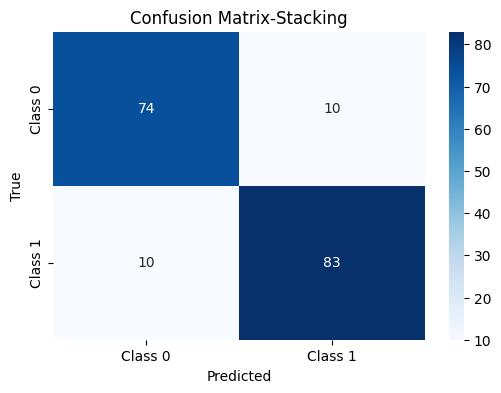

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix-Stacking')
plt.show()

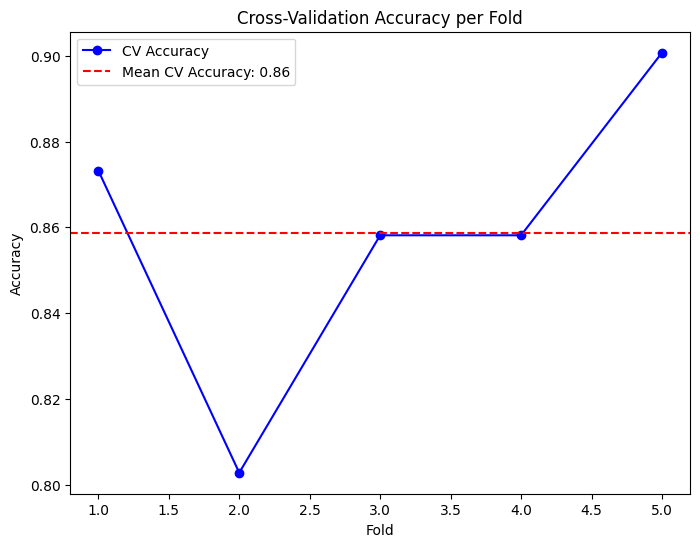

In [24]:
# Plot training accuracy for cross-validation folds
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b', label='CV Accuracy')
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label=f'Mean CV Accuracy: {np.mean(cv_scores):.2f}')
plt.title('Cross-Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()